<a href="https://colab.research.google.com/github/adesai1033/MATH452/blob/main/project2_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Data Preprocessing


*   Load the CIFAR-10 dataset.
* Visualize dataset.
*   Normalize dataset.



In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

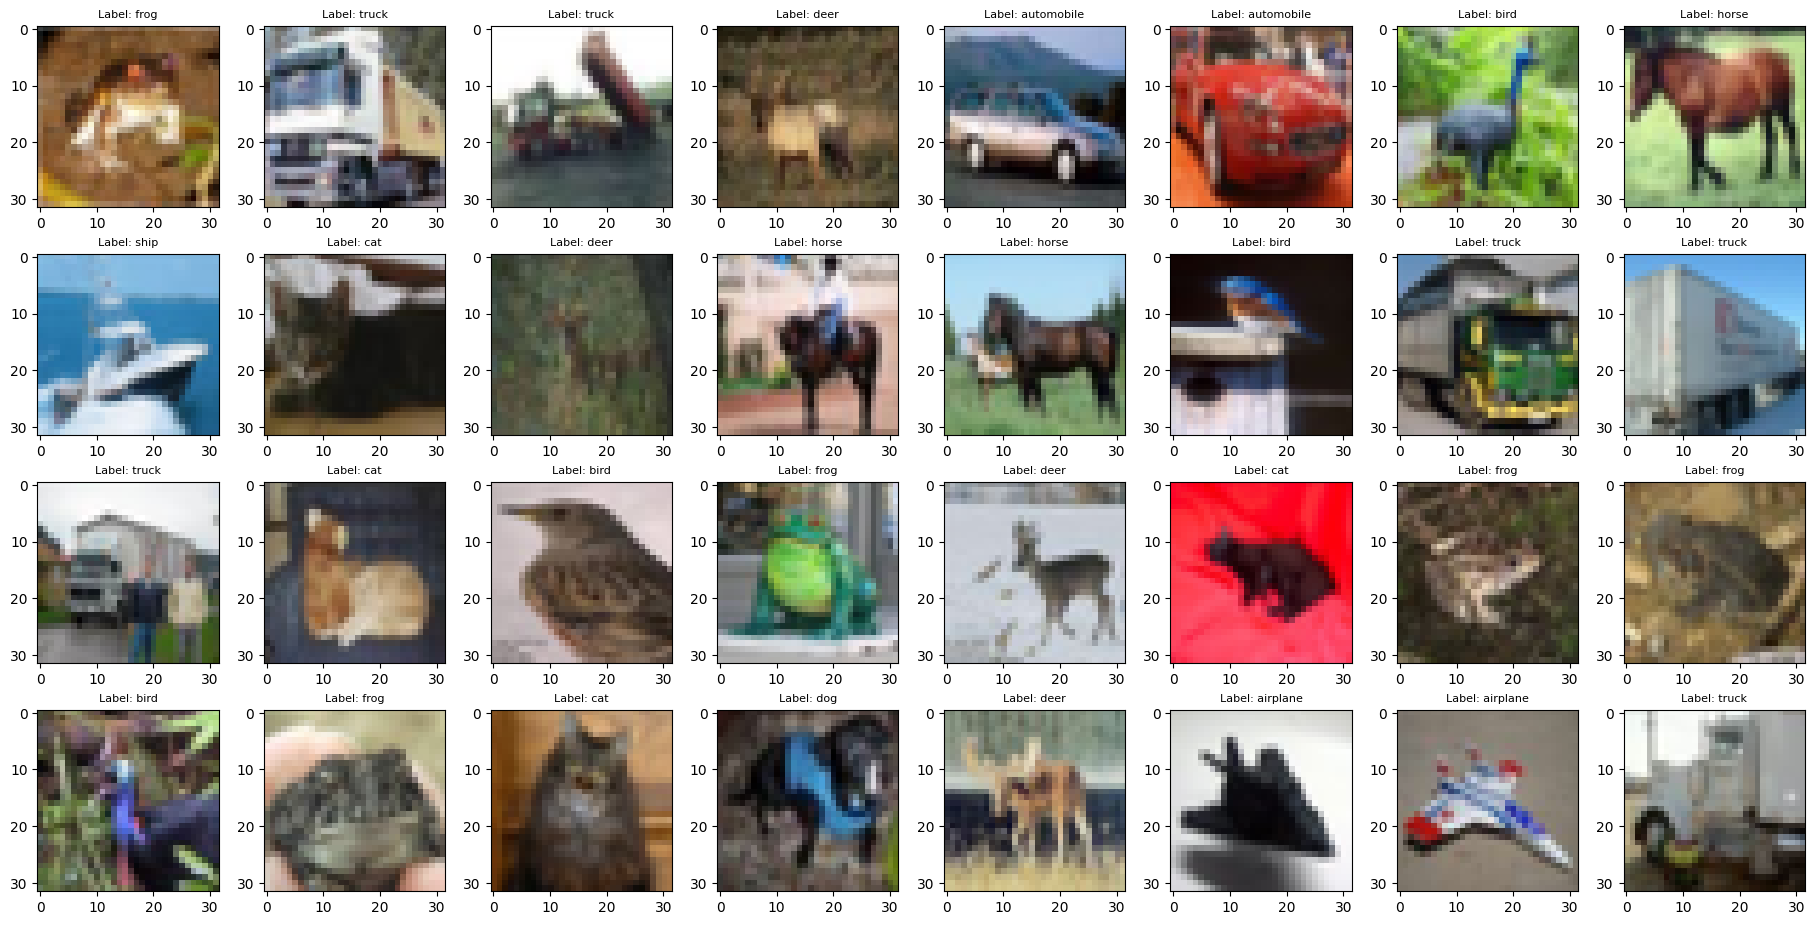

In [18]:
# Display first 32 images of the dataset with its label.
label_mapping = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(X_train[i])
    plt.title("Label: {}".format(label_mapping[y_train[i][0]]), fontsize=8)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig('cifar10_images.png', dpi=300)
plt.show()

In [19]:
# Normalize the pixel value from [0,255] to the range [0,1]
X_train = X_train / 255
X_test = X_test / 255

# Baseline CNN Model

*   Designed and implemented a simple Convolutional Neural Network (CNN) architecture for classification
*   Included basic layers: convolutional layers, activation functions, pooling layers, and fully connected layers.
* Compiled the model with an optimizer (Adam), and loss function (categorical cross-entropy)


In [ ]:
model = Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5), # Dropout layer with 50% dropout rate
        tf.keras.layers.Dense(10)
    ]
)

C:\Users\AminA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Baseline Model


*   Trained the baseline CNN using the training set and evaluate performance on the validation set.
*   Record metrics: accuracy and loss.


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_test, y_test))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2619 - loss: 1.9550 - val_accuracy: 0.5000 - val_loss: 1.3589
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4777 - loss: 1.4530 - val_accuracy: 0.5736 - val_loss: 1.1896
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5366 - loss: 1.2964 - val_accuracy: 0.5883 - val_loss: 1.1552
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5684 - loss: 1.2119 - val_accuracy: 0.6201 - val_loss: 1.0714
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6059 - loss: 1.1359 - val_accuracy: 0.6453 - val_loss: 1.0059
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6309 - loss: 1.0562 - val_accuracy: 0.6415 - val_loss: 1.0231
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6471 - loss: 0.9990 - val_accuracy: 0.6772 - val_loss: 0.9368
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6628 - loss: 0.9630 -

313/313 - 1s - 2ms/step - accuracy: 0.7233 - loss: 0.8892


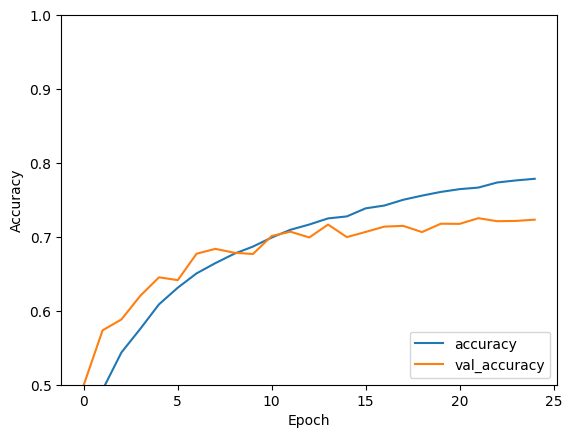

In [13]:
# Plotting training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

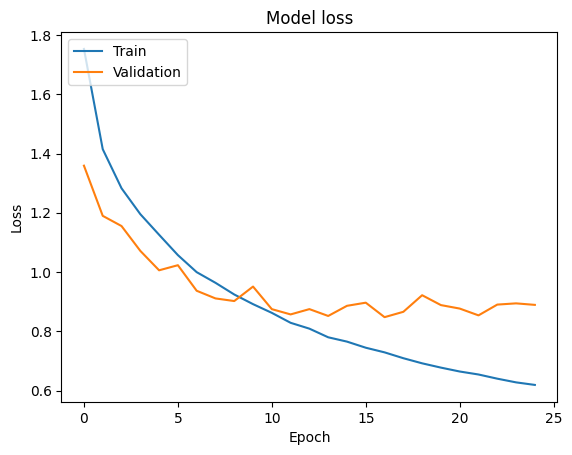

In [14]:
# Plot training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


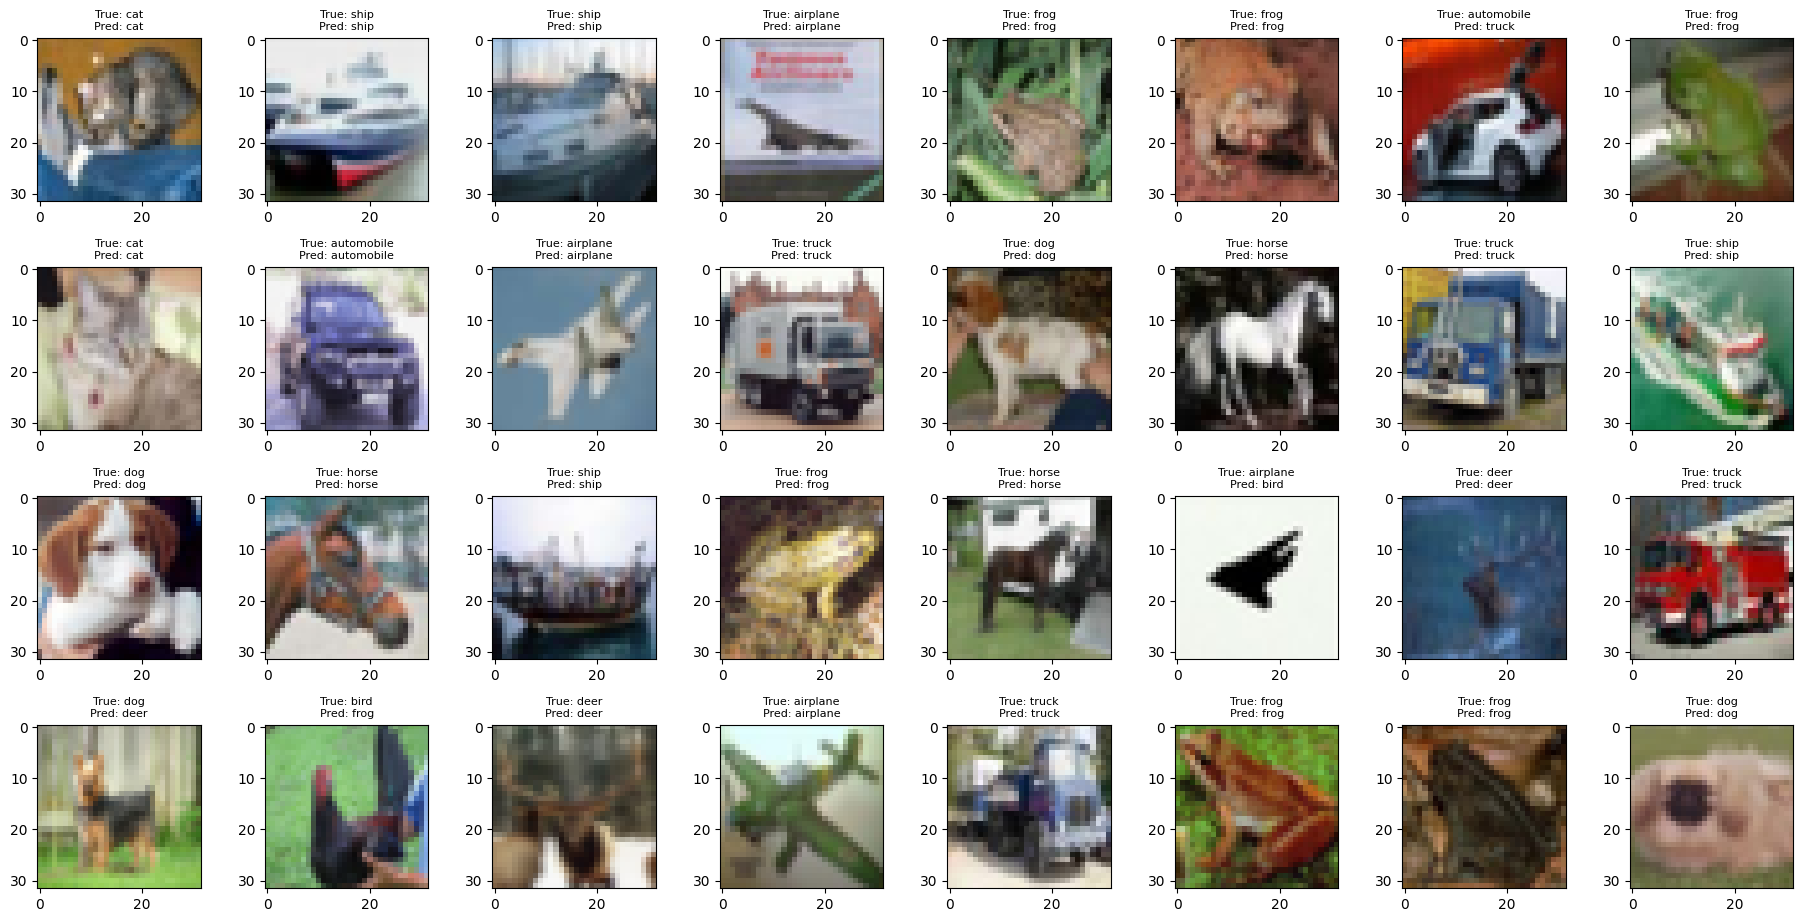

In [20]:
# Get predictions for the test dataset
predictions = model.predict(X_test)

# Convert predictions to label indices
predicted_labels = np.argmax(predictions, axis=1)

# Plot the first 32 images from the test dataset with their true and predicted labels
fig = plt.figure(1)
fig.set_size_inches(18.5, 18.5)
for i in range(32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(X_test[i])
    true_label = label_mapping[y_test[i][0]]
    predicted_label = label_mapping[predicted_labels[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=8)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.4, wspace=0.30)
plt.savefig('cifar10_inference.png', dpi=300)
plt.show()